# Grade Analytics - Machine Learning Project

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preprocessing**

In [258]:
df=pd.read_csv("Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [259]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [260]:
drop_column=df.columns[:-1][8:]
print(drop_column)
df.drop(columns=drop_column,inplace=True)
df.drop(columns=['Seat No.'], inplace=True)

Index(['EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')


In [261]:
df.shape

(571, 8)

In [262]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,CGPA
0,B-,D+,C-,C,C-,D+,D,2.205
1,A,D,D+,D,B-,C,D,2.008
2,A,B,A,B-,B+,A,B-,3.608
3,D,C+,D+,D,D,A-,D+,1.906
4,A-,A-,A-,B+,A,A,A-,3.448


In [263]:
df.tail()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,CGPA
566,B,A,A,A-,A+,A,A-,3.798
567,A+,A,A,A,A,A,A,3.772
568,B,A,A-,B+,A,A,A,3.470
569,A,B+,D,A,D,D+,B-,2.193
570,C,D,D,C,C,D+,B,1.753


In [264]:
df.describe(include='all')

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,CGPA
count,571,571,570,570,569,571,569,571.000000
unique,13,12,13,13,13,11,13,NaN
top,A-,A-,A,A,A-,A,A-,NaN
freq,112,82,177,96,105,151,116,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.954888
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620552
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.538000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.029000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.451000


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   CGPA       571 non-null    float64
dtypes: float64(1), object(7)
memory usage: 35.8+ KB


In [266]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       1
HS-105/12    1
MT-111       2
CS-105       0
CS-106       2
CGPA         0
dtype: int64

In [267]:
for column in df.columns:
  df[column].fillna(df[column].mode()[0], inplace=True)
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
CGPA         0
dtype: int64

## **Exploratory Data Analysis**

In [268]:
grade_list = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'WU']

### **Countplot**

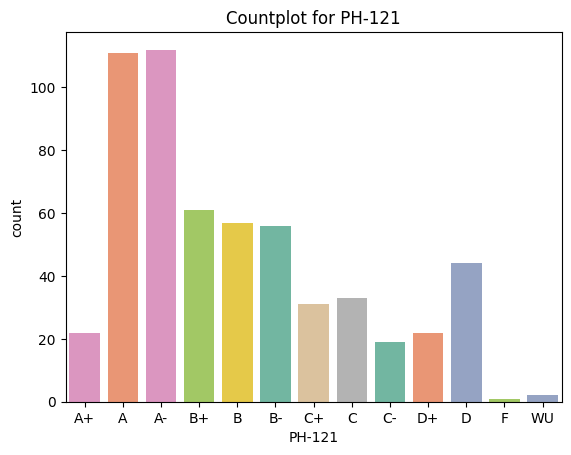

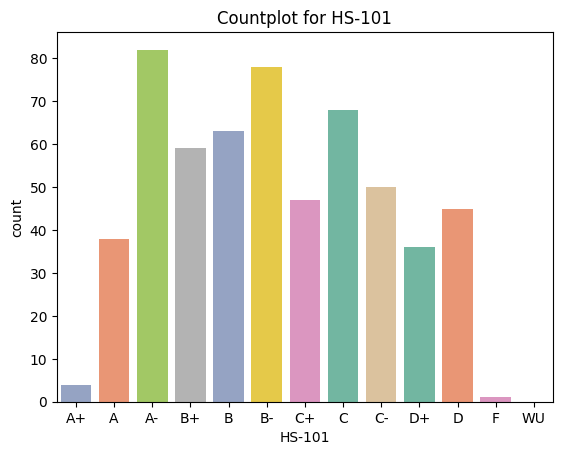

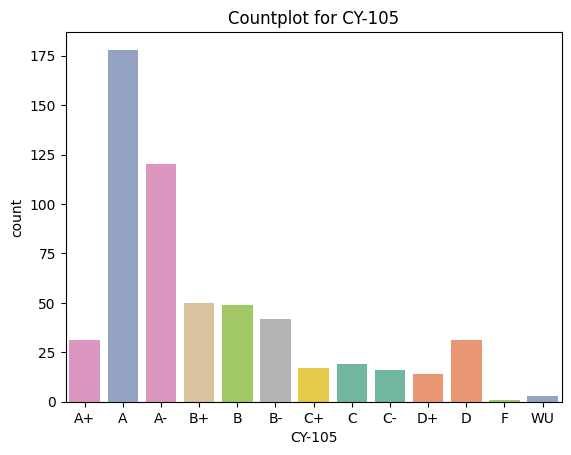

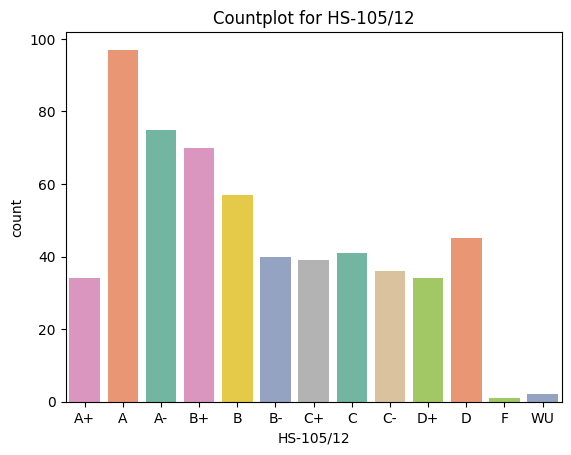

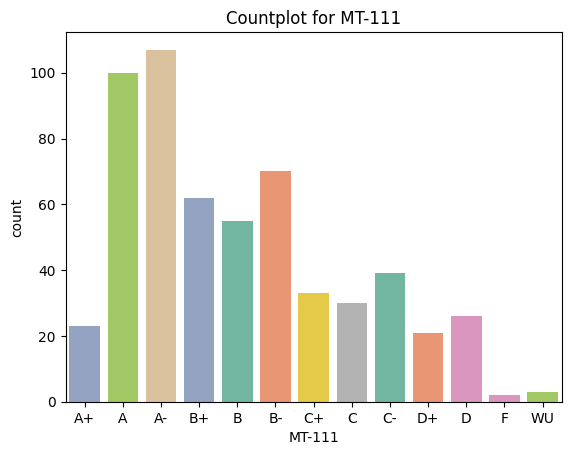

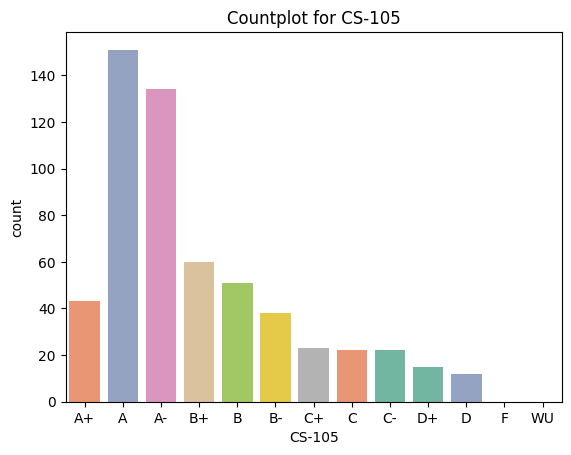

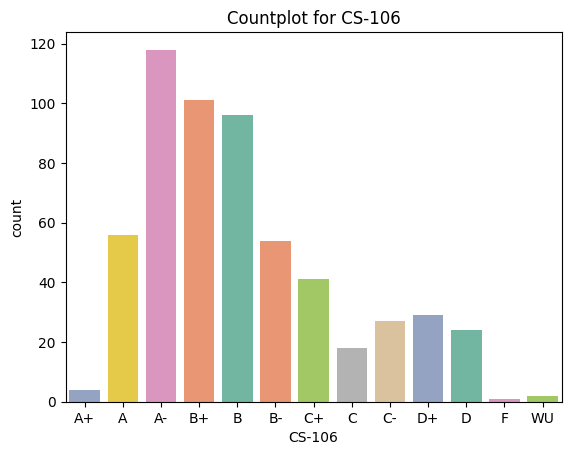

In [269]:
for i in df.columns[:-1]:
    sns.countplot(x=i, data=df, palette='Set2', legend=False, hue=i, order=grade_list)
    plt.title(f'Countplot for {i}')
    plt.show()

### **Scatter/Strip Plot**

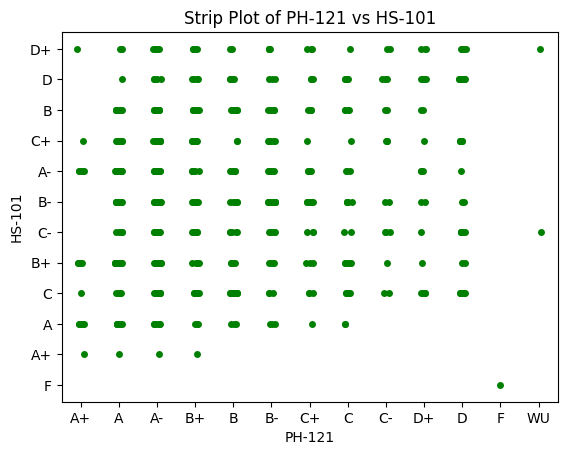

In [270]:
sns.stripplot(data=df, x=df['PH-121'], y=df['HS-101'], color='green', order=grade_list)
plt.xlabel('PH-121')
plt.ylabel('HS-101')
plt.title('Strip Plot of PH-121 vs HS-101')
plt.show()

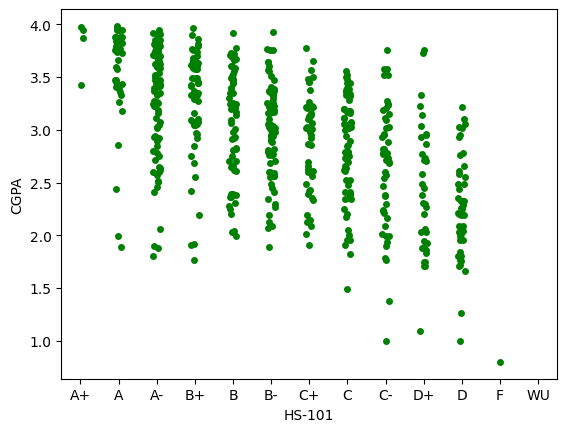

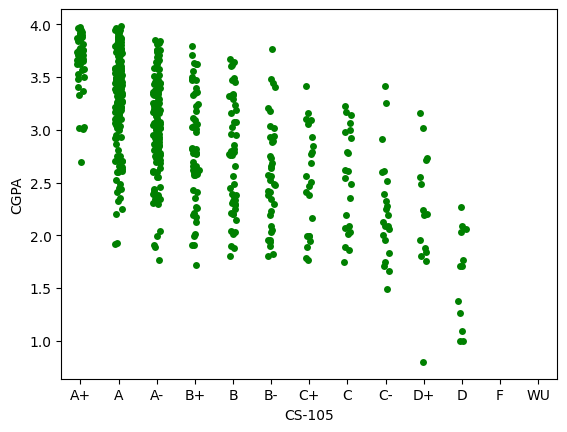

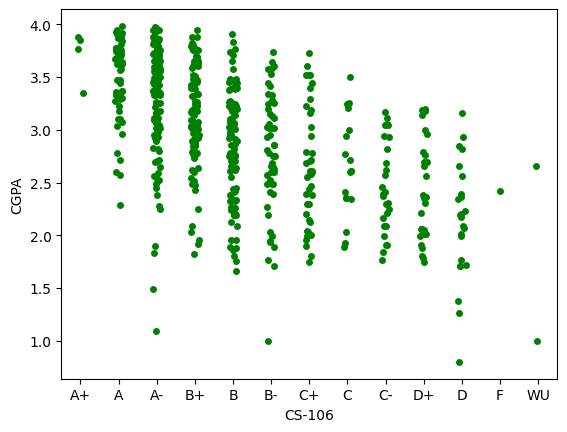

In [271]:
sns.stripplot(data=df, x=df['HS-101'], y=df['CGPA'], color='green', order=grade_list)
plt.show()
sns.stripplot(data=df, x=df['CS-105'], y=df['CGPA'], color='green', order=grade_list)
plt.show()
sns.stripplot(data=df, x=df['CS-106'], y=df['CGPA'], color='green', order=grade_list)
plt.show()

### **Box and Violin Plots**

In [272]:
df2 = df.copy()
df2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,CGPA
0,B-,D+,C-,C,C-,D+,D,2.205
1,A,D,D+,D,B-,C,D,2.008
2,A,B,A,B-,B+,A,B-,3.608
3,D,C+,D+,D,D,A-,D+,1.906
4,A-,A-,A-,B+,A,A,A-,3.448
...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,3.798
567,A+,A,A,A,A,A,A,3.772
568,B,A,A-,B+,A,A,A,3.470
569,A,B+,D,A,D,D+,B-,2.193


In [273]:
print(grade_list)
grade_mapping = {}
for i in range(len(grade_list)):
    grade_mapping[grade_list[i]] = len(grade_list)-i-1
print(grade_mapping)

['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'WU']
{'A+': 12, 'A': 11, 'A-': 10, 'B+': 9, 'B': 8, 'B-': 7, 'C+': 6, 'C': 5, 'C-': 4, 'D+': 3, 'D': 2, 'F': 1, 'WU': 0}


In [274]:
for col in df2.columns[:-1]:
  df2[col] = df2[col].map(grade_mapping)
df2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,CGPA
0,7,3,4,5,4,3,2,2.205
1,11,2,3,2,7,5,2,2.008
2,11,8,11,7,9,11,7,3.608
3,2,6,3,2,2,10,3,1.906
4,10,10,10,9,11,11,10,3.448
...,...,...,...,...,...,...,...,...
566,8,11,11,10,12,11,10,3.798
567,12,11,11,11,11,11,11,3.772
568,8,11,10,9,11,11,11,3.470
569,11,9,2,11,2,3,7,2.193


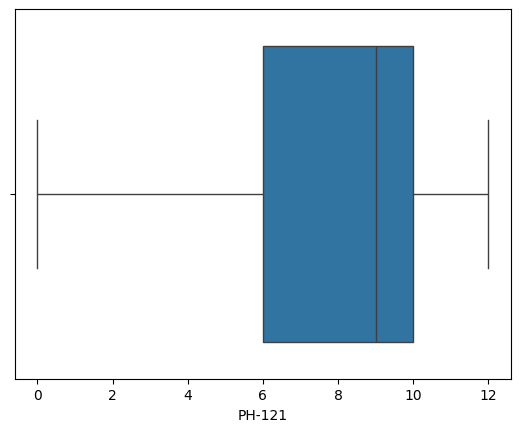

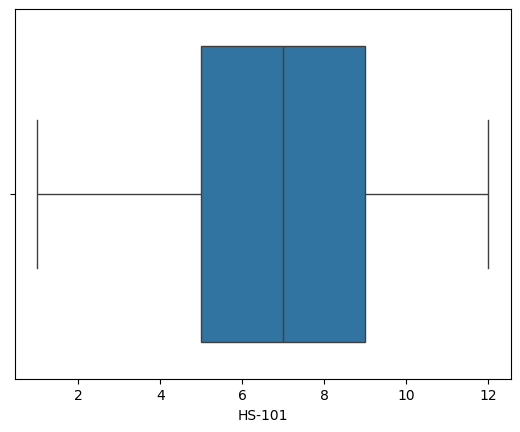

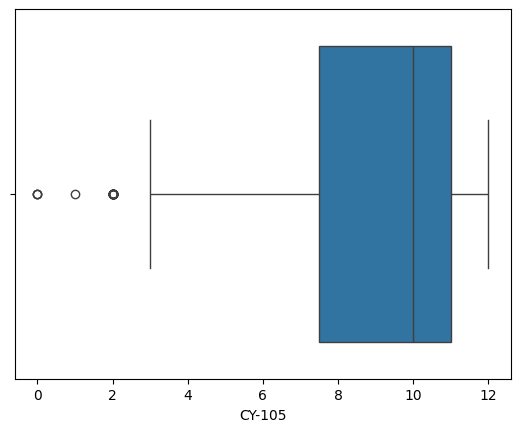

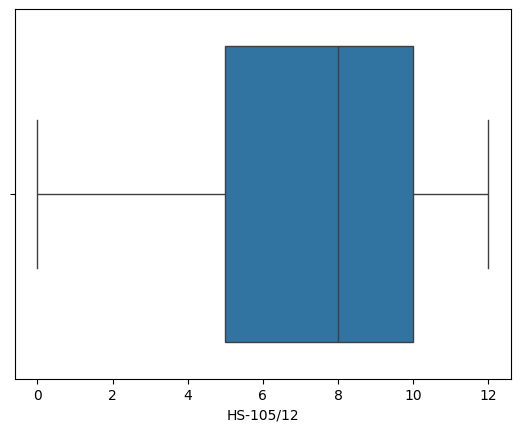

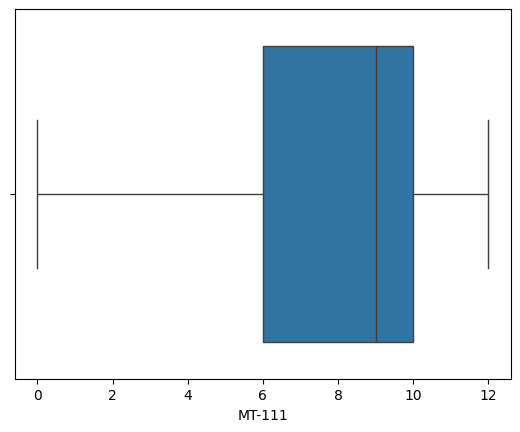

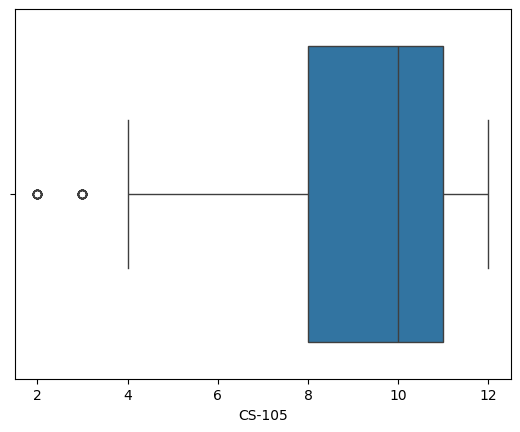

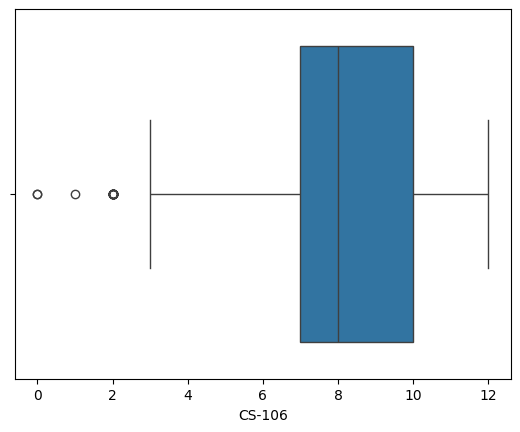

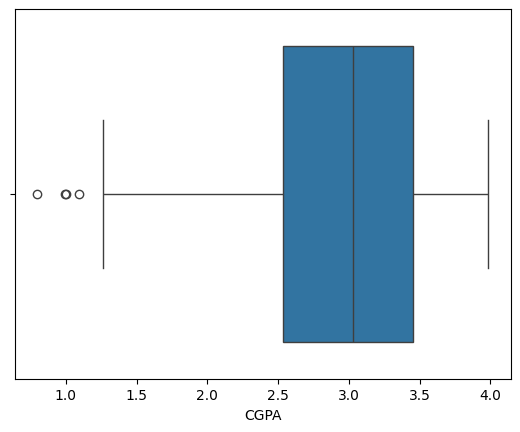

In [275]:
for i in df2.columns:
    sns.boxplot(x=i, data=df2, orient='h')
    plt.show()

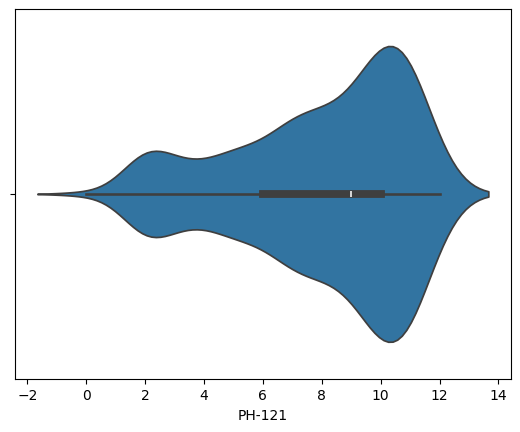

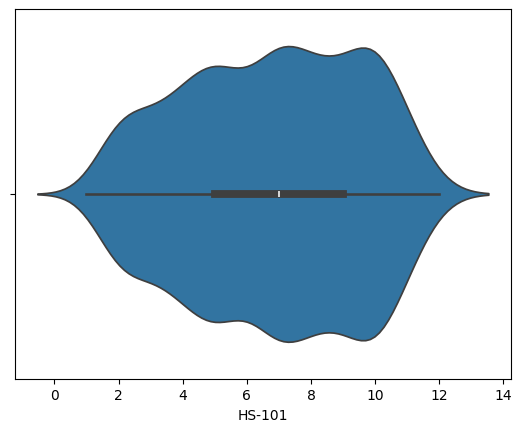

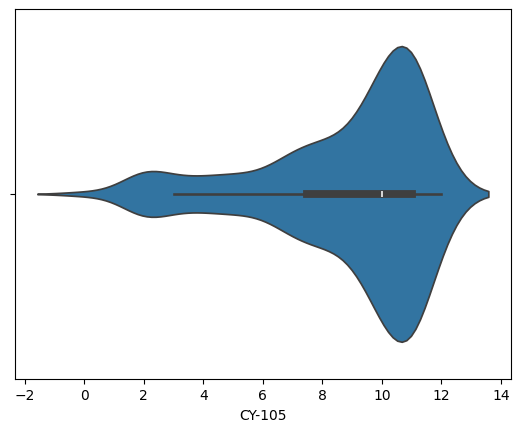

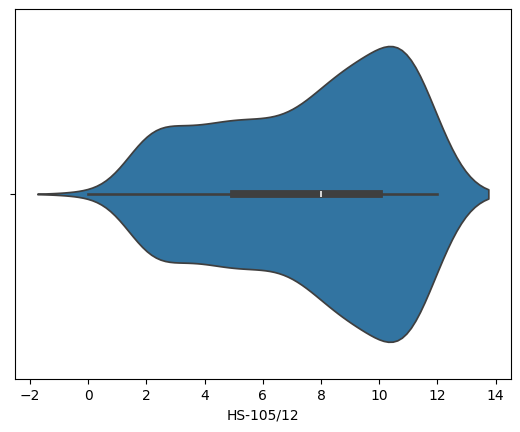

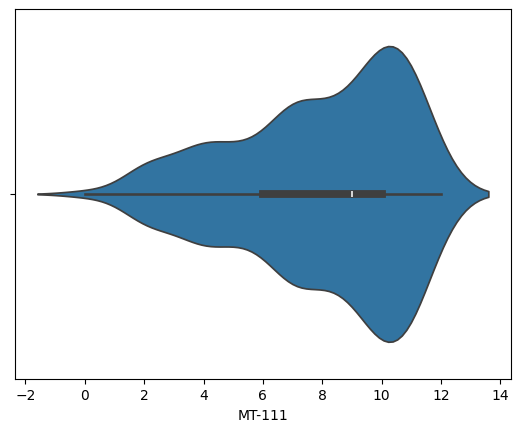

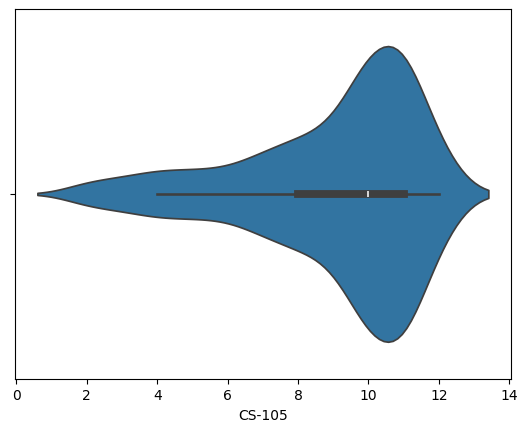

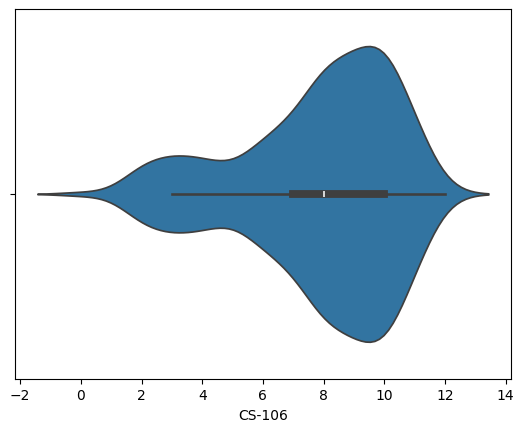

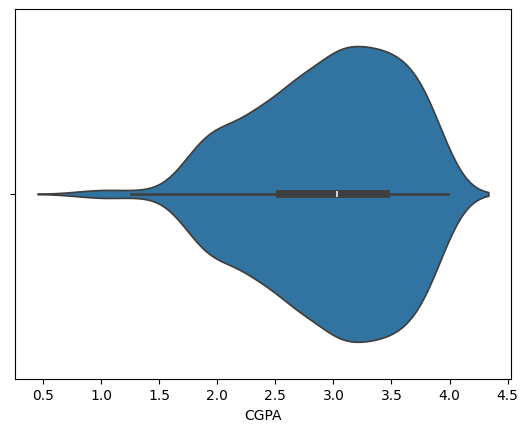

In [276]:
for i in df2.columns:
    sns.violinplot(x=i, data=df2)
    plt.show()

### **Correlation Matrix**

In [277]:
df2.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,CGPA
PH-121,1.000000,0.408386,0.626572,0.549676,0.494110,0.672645,0.303391,0.680941
HS-101,0.408386,1.000000,0.362929,0.490250,0.463471,0.444827,0.362976,0.560989
CY-105,0.626572,0.362929,1.000000,0.583896,0.576232,0.618138,0.403414,0.685564
HS-105/12,0.549676,0.490250,0.583896,1.000000,0.526262,0.540200,0.526946,0.657252
MT-111,0.494110,0.463471,0.576232,0.526262,1.000000,0.434376,0.543269,0.749554
CS-105,0.672645,0.444827,0.618138,0.540200,0.434376,1.000000,0.302261,0.644594
CS-106,0.303391,0.362976,0.403414,0.526946,0.543269,0.302261,1.000000,0.573354
CGPA,0.680941,0.560989,0.685564,0.657252,0.749554,0.644594,0.573354,1.000000


<Axes: >

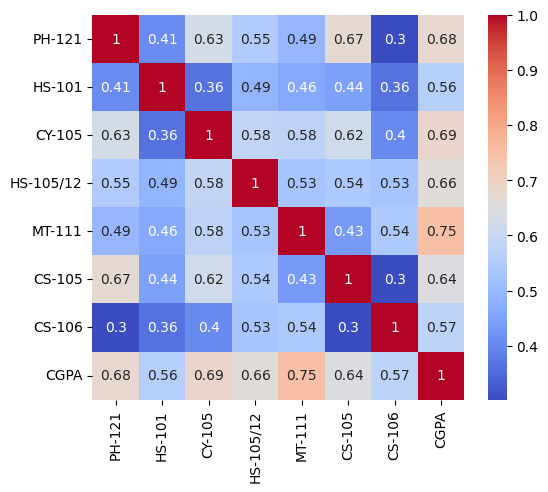

In [278]:
plt.figure(figsize=(6,5))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

## Clustering

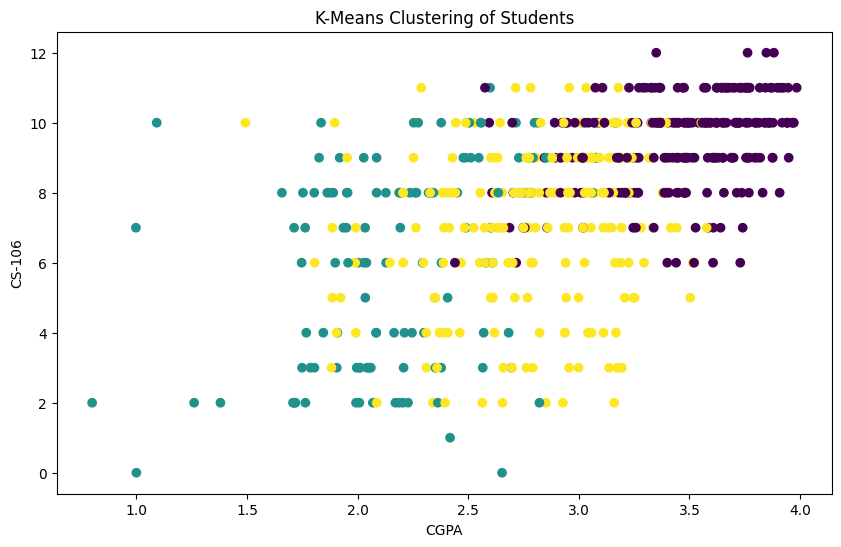

In [279]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df2.drop(['CGPA'], axis=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
df2['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df2['CGPA'], df2['CS-106'], c=df2['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Students')
plt.xlabel('CGPA')
plt.ylabel('CS-106')
plt.show()

## CGPA Prediction (Using 4 Subjects)

Available Subjects: 			 ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106']
Selected Subjects: 			 ['CS-106', 'CS-105', 'PH-121', 'HS-101']
Mean Squared Error: 			 0.111047665628309
Coefficient of determination (R^2): 	 0.6663106326851918



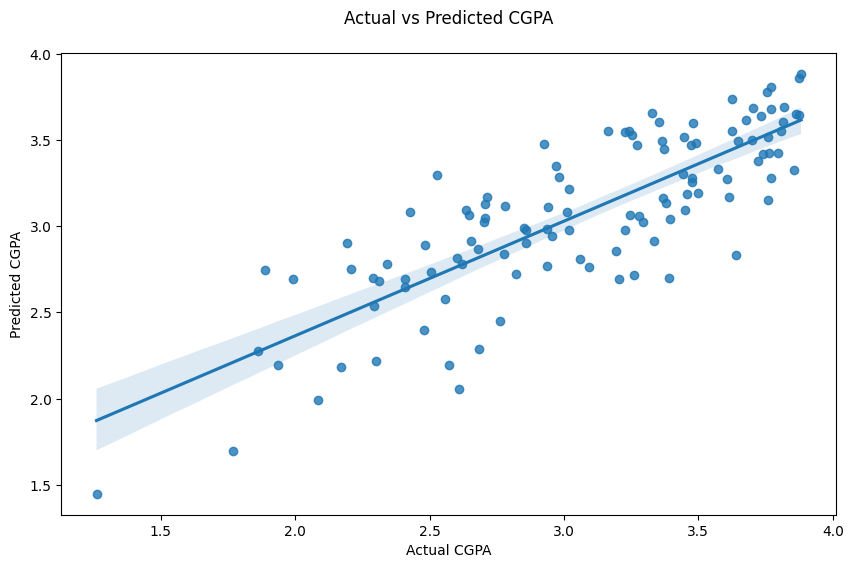

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from random import shuffle

cols = df2.columns[:-2].tolist()
print(f'Available Subjects: \t\t\t {cols}')
shuffle(cols)
cols = cols[0:4]
print(f'Selected Subjects: \t\t\t {cols}')

X = df2[cols]
y = df2['CGPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
score = model.score(X_test, y_test)

print(f'Mean Squared Error: \t\t\t {mse}')
print(f'Coefficient of determination (R^2): \t {score}\n')

output = pd.DataFrame({'Actual CGPA': y_test, 'Predicted CGPA': y_pred})
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual CGPA', y='Predicted CGPA', data=output, ci=95)
plt.title('Actual vs Predicted CGPA\n')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

In [281]:
!quarto preview Grade_Analytics.ipynb

pandoc 
  to: html
  output-file: Grade_Analytics.html
  standalone: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  
metadata
  document-css: false
  link-citations: true
  date-format: long
  lang: en
  title: Grade Analytics - Machine Learning Project
  
Output created: Grade_Analytics.html

Watching files for changes
Browse at http://localhost:4792/
pandoc 
  to: html
  output-file: Grade_Analytics.html
  standalone: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  
metadata
  document-css: false
  link-citations: true
  date-format: long
  lang: en
  title: Grade Analytics - Machine Learning Project
  
Output created: Grade_Analytics.html

Watching files for changes
pandoc 
  to: html
  output-file: Grade_Analytics.html
  standalone: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  
metadata
  document-css: false
  link-citations